Notebook visualizing the probability of a Martingale bet which pays +wager and -wager half the time resp.
Gambling is stopped in the case the total loss is bigger than 100.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
from probability_calculator import RandomVariable, NumericRandomVariable
from fractions import Fraction
from math import inf, log, exp
from numpy import logaddexp, array

In [2]:
step_count = 0
state = {
    "0": NumericRandomVariable(outcomes=[{"p": 1, "value": 0}]),
    "out": NumericRandomVariable()
}
max_loss = -100
pob_curve = []
pop_curve = []

def step(step_count, state):
    new_state = {
        "0": NumericRandomVariable(),
        "out": state["out"]
    }

    for key, rv in state.items():
        if key == "out":
            continue
        ikey = int(key)
        price = 2**ikey
        rv.pscale(0.5)
        new_state["0"] = new_state["0"].concat(rv + NumericRandomVariable([{ "p": 1, "value": price }]))
        [out, rv2] = (rv + NumericRandomVariable([{ "p": 1, "value": -price }])).split(max_loss)
        new_state[str(ikey + 1)] = rv2
        new_state["out"] = new_state["out"].concat(out)

    return step_count+1, new_state

1 Total probability: 1.0  outp  0  pop  0.5
2 Total probability: 1.0  outp  0  pop  0.5
3 Total probability: 1.0000000000000002  outp  0  pop  0.6249999999999999
4 Total probability: 1.0  outp  0  pop  0.6875
5 Total probability: 1.0  outp  0  pop  0.71875
6 Total probability: 1.0000000000000002  outp  0  pop  0.75
7 Total probability: 1.0000000000000002  outp  0.007812500000000002  pop  0.78125
8 Total probability: 1.0000000000000002  outp  0.011718750000000003  pop  0.8046875
9 Total probability: 1.0000000000000002  outp  0.015625000000000003  pop  0.8242187499999999
10 Total probability: 1.0000000000000004  outp  0.019531250000000003  pop  0.8359375
11 Total probability: 1.0  outp  0.023437500000000003  pop  0.84375
12 Total probability: 0.9999999999999998  outp  0.027343750000000003  pop  0.8493652343749999
13 Total probability: 0.9999999999999998  outp  0.03125000000000001  pop  0.853759765625
14 Total probability: 0.9999999999999998  outp  0.03515625000000001  pop  0.85791015625


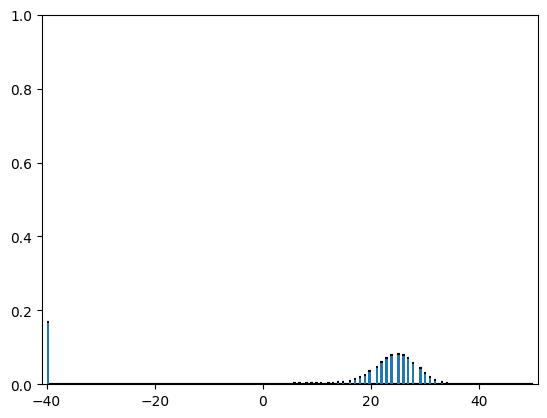

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [3]:
for i in range(50):
    step_count, state = step(step_count, state)
    for i, rv in state.items():
        p = 0
        for part in rv._parts:
            p += exp(part._logp)

    s = NumericRandomVariable()
    for i, rv in state.items():
        s = s.concat(rv)
    p = 0
    outp = 0
    for i, rv in state.items():
        localp = 0
        for part in rv._parts:
            localp += exp(part._logp)
        p += localp
        if i == "out":
            outp += localp
    pop = 1 - s.cdf(0)[1]

    pop_curve.append(pop)
    pob_curve.append(outp)

    print(i, "Total probability:", p, " outp ", outp, " pop ", pop)

s.plot_histogram(lower_value=-40, steps=201)

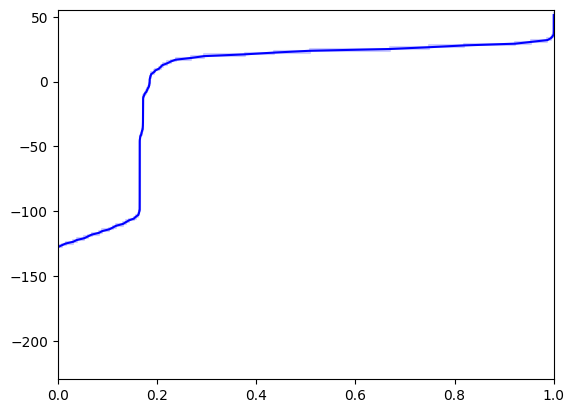

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [4]:
s.plot_quantils(steps=201)

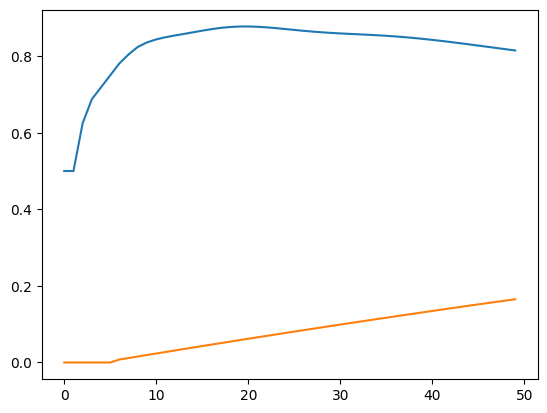

In [5]:
plt.plot(pop_curve)
plt.plot(pob_curve)